#  FraudXplorer - Fraud Detection using Supervised Machine Learning
Logistic Regression, Decision Tree, Random Forest and XGBoost on Imbalanced Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [3]:
!pip install xgboost
from xgboost import XGBClassifier

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.7 MB 342.7 kB/s eta 0:04:56
   ---------------------------------------- 0.5/101.7 MB 342.7 kB/s eta 0:04:56
   ---------------------------------------- 0.5/101.7 MB 342.7 kB/s eta 0:04:56
   ---------------------------------------- 0.5/101.7 MB 342.7 kB/s eta 0:04:56
   ---------------------------------------- 0.5/101.7 MB 342.7 kB/s eta 0:04:56
   ---------------------------------------- 0.8/101.7 MB 264.3 kB/s eta 0:06:22
   ---------------------------------------- 0.8/101.7 MB 264.3 kB/s eta 0:06:22
   ---------------------------------------- 1.0/101.7 MB 335.5 kB/s eta 0:05:00
   --

## Load and Explore the Dataset

In [17]:
# original datset
data=pd.read_csv(r'C:\Users\Dell\Fraud Detection in Credit Card Transactions\paysim.csv')
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [18]:
# Load a subset of the paysim dataset
df = pd.read_csv(r'C:\Users\Dell\Fraud Detection in Credit Card Transactions\paysim.csv', nrows=400000)

# Display first few rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Data Cleaning and Preprocessing

In [19]:
# Drop columns that are not useful for modeling
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Encode categorical 'type' column
df['type'] = df['type'].astype('category').cat.codes

#  Normalize the 'amount' column
df['amount'] = (df['amount'] - df['amount'].mean()) / df['amount'].std()

# Display dataset info
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            400000 non-null  int64  
 1   type            400000 non-null  int8   
 2   amount          400000 non-null  float64
 3   oldbalanceOrg   400000 non-null  float64
 4   newbalanceOrig  400000 non-null  float64
 5   oldbalanceDest  400000 non-null  float64
 6   newbalanceDest  400000 non-null  float64
 7   isFraud         400000 non-null  int64  
 8   isFlaggedFraud  400000 non-null  int64  
dtypes: float64(5), int64(3), int8(1)
memory usage: 24.8 MB


## Class Distribution Before SMOTE

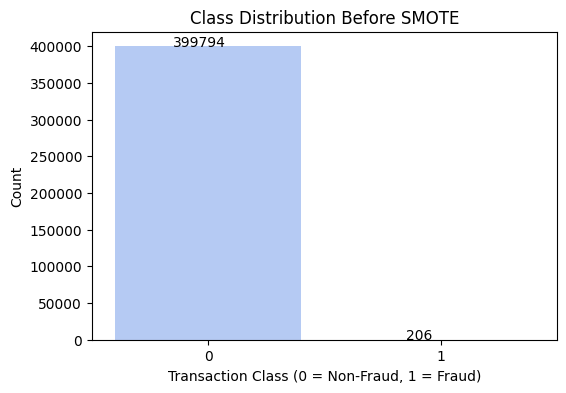

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df, hue='isFraud', palette='coolwarm', legend=False)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Transaction Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', (p.get_x() + 0.25, height + 500))

plt.show()


 ## Train-Test Split and SMOTE

In [8]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

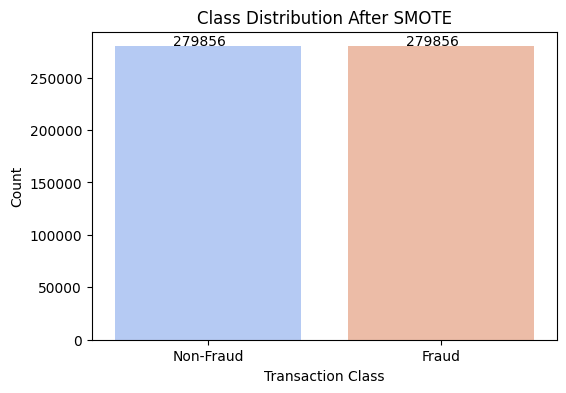

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_sm, palette='coolwarm', hue=y_train_sm, legend=False)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + 0.25, p.get_height() + 500))
plt.show()

## Train Models

In [ ]:
# Logistic Regression with regularization and class balance
lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear',     # Better for small datasets or imbalanced classes
    C=0.1                   # Regularization strength (lower = more regularization)
)

# Decision Tree with controlled depth and class balance
dt = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

# Optimized Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42
)

# XGBoost model with tuned parameters for better precision
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=12,   # Adjust this based on class imbalance ratio (approx non-fraud/fraud)
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)



lr.fit(X_train_sm, y_train_sm)
dt.fit(X_train_sm, y_train_sm)
rf.fit(X_train_sm, y_train_sm)
xgb.fit(X_train_sm, y_train_sm)


c:\Users\Dell\anaconda3\envs\fraud_detection\lib\site-packages\xgboost\training.py:200: UserWarning: [23:23:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

## Evaluate Models on Test Set

In [ ]:
models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf, 'XGBoost': xgb}

for name, model in models.items():
    print(f"\n🔍 Evaluation for {name}:")
    y_pred = model.predict(X_test)
    print("Accuracy:", model.score(X_test, y_test))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print('-----------------------------------------------------------')


🔍 Evaluation for Logistic Regression:
Accuracy: 0.8552166666666666
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    119938
           1       0.00      0.84      0.01        62

    accuracy                           0.86    120000
   macro avg       0.50      0.85      0.46    120000
weighted avg       1.00      0.86      0.92    120000

Confusion Matrix:
 [[102574  17364]
 [    10     52]]
-----------------------------------------------------------

🔍 Evaluation for Decision Tree:
Accuracy: 0.9027833333333334
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    119938
           1       0.00      0.90      0.01        62

    accuracy                           0.90    120000
   macro avg       0.50      0.90      0.48    120000
weighted avg       1.00      0.90      0.95    120000

Confusion Matrix:
 [[108278  11660]
 [     6     56]]
------------------------------------------------

## Saving the best performed model

In [11]:
import joblib
joblib.dump(xgb, "xgb_model.pkl")
print(" XGBoost model saved as xgb_model.pkl")

XGBoost model saved as xgb_model.pkl


# 🌐 Streamlit Interface for FraudXplorer

In [12]:
!pip install streamlit

  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.1 MB 699.0 kB/s eta 0:00:13
   -- ------------------------------------- 0.5/9.1 MB 699.0 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/9.1 MB 671.3 kB/s eta 0:00:13
   ----- ---------------------------------- 1.3/9.1 MB 986.4 kB/s eta 0:00:08
   ------ --------------------------------- 1.6/9.1 MB 1.1 MB/s eta 0:00:08
   -------- ------------------------------- 1.8/9.1 MB 1.1 MB/s eta 0:00:07
   ---------- ----------------------------- 2.4/9.1 MB 1.3 MB/s eta 0:00:06
   ----------- ---------------------------- 2.6/9.1 MB 1.3

In [13]:
interface_code = '''
import streamlit as st
import pandas as pd
import joblib

# Page title
st.set_page_config(page_title="FraudXplorer", layout="centered")
st.title("🔍 FraudXplorer - Fraud Detection in Transactions (XGBoost)")

# Load model
@st.cache_resource
def load_model():
    return joblib.load("xgb_model.pkl")

model = load_model()

# Upload CSV
uploaded_file = st.file_uploader("📁 Upload your CSV file", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)

    st.subheader("📊 Uploaded Dataset")
    st.write(df.head())

    # Drop target column if present
    if 'isFraud' in df.columns:
        df = df.drop('isFraud', axis=1)

    # Encode 'type' column if present
    if 'type' in df.columns:
        df['type'] = df['type'].astype('category').cat.codes

    #  Normalize 'amount' column if present
    if 'amount' in df.columns:
        df['amount'] = (df['amount'] - df['amount'].mean()) / df['amount'].std()

    #  Drop unnecessary columns if present
    drop_cols = ['nameOrig', 'nameDest']
    df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

    try:
        #  Predict probabilities and apply threshold
        proba = model.predict_proba(df)[:, 1]
        predictions = (proba > 0.3).astype(int)  # You can fine-tune this threshold

        df['Prediction'] = predictions
        df['Prediction'] = df['Prediction'].map({0: 'Not Fraud', 1: 'Fraud'})

        #  Filter and show only fraud cases
        fraud_df = df[df['Prediction'] == 'Fraud']

        st.subheader("🚨 Detected Fraud Transactions")
        if not fraud_df.empty:
            st.dataframe(fraud_df)
        else:
            st.info(" No fraud transactions detected.")

        #  Fraud count summary
        fraud_count = len(fraud_df)
        st.success(f"🔐 Total Fraud Transactions Detected: {fraud_count}")

    except Exception as e:
        st.error(f"❌ Error during prediction: {e}")
'''


In [14]:
with open("fraudxplorerr_app.py", "w", encoding="utf-8") as f:
    f.write(interface_code)

print(" Streamlit interface for XGBoost saved as fraudxplorerr_app.py")


 Streamlit interface for XGBoost saved as fraudxplorerr_app.py
